# Campus Recruitment

This dataset represents student's grades over the course of their education, as well as information about them getting (or not) a job after Univeristy.

We will try to create models that will predict if a student, based on his education history, gets a job.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv('data/Placement_Data_Full_Class.csv', sep=",")

print(df.shape)

(215, 15)


In [2]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# Columns Description

 from Kaggle dataset provider)

**sl_no** - Serial Number

**gender** - Gender- {Male='M',Female='F'}

**ssc_p** - Secondary Education percentage- 10th Grade

**ssc_b** - Board of Education

**hsc_p** - Higher Secondary Education percentage- 12th Grade

**hsc_s** - Specialization in Higher Secondary Education

**degree_p** - Degree Percentage

**degree_t** - Under Graduation(Degree type)- Field of degree education

**workex** - Work Experience 

**etest_p** - Employability test percentage (conducted by college)

**specialisation** - Post Graduation(MBA) Specialization

**mba_p** - MBA percentage

**status** - Status of placement- Placed/Not placed

**salary** - Salary offered by corporate to candidates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


(215 - 148 = 67) osób nie dostało pracy - stąd brak wynagrodzenia

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
import pandas_profiling
df.profile_report(title='Campus Placement Data - Report', progress_bar=False)

# Preprocessing

**sl_no** to unikalny indeks, nie będzie potrzebny.

**salary** też nie będzie nam potrzebne - salary jest nullem tam, gdzie status jest "Not Placed".

In [7]:
df.drop("sl_no", axis=1, inplace=True)
df.drop("salary", axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [8]:
data = df.copy()

In [9]:
data['workex'].replace(to_replace="Yes", value=1, inplace=True)
data['workex'].replace(to_replace="No", value=0, inplace=True)

data['status'].replace(to_replace="Placed", value=1, inplace=True)
data['status'].replace(to_replace="Not Placed", value=0, inplace=True)

data['gender'].replace(to_replace="M", value=1, inplace=True)
data['gender'].replace(to_replace="F", value=0, inplace=True)

In [10]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['ssc_b']= le.fit_transform(data['ssc_b'])
data['hsc_b']= le.fit_transform(data['hsc_b'])
data['hsc_s']= le.fit_transform(data['hsc_s'])
data['degree_t']= le.fit_transform(data['degree_t'])
data['specialisation']= le.fit_transform(data['specialisation'])

data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


OneHot Encoding:

In [12]:

one_hot = ['hsc_s', 'degree_t']

for i in range(0, len(one_hot)):
    data[f'{one_hot[i]}'] = pd.Categorical(data[f'{one_hot[i]}'])
    dummies = pd.get_dummies(data[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    data.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)
    
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_encoded_0,hsc_s_encoded_1,hsc_s_encoded_2,degree_t_encoded_0,degree_t_encoded_1,degree_t_encoded_2
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [13]:
data["status"].sum() / data.shape[0]
# zatrudnionych jest prawie 3/4 wszystkich badanych,
# więc naiwnie policzone accuracy rzędu 68 można by uzyskać przez zawsze odpowiadanie "zatrudniony"

0.6883720930232559

In [14]:
# from sklearn.preprocessing import StandardScaler
# scaling=["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
# sc = StandardScaler()
# scaled=sc.fit_transform(data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
# scaled = pd.DataFrame(scaled,columns=scaling)
# data=data.drop(columns=scaling,axis=1)
# data=scaled.merge(data, left_index=True, right_index=True)

# data.head()

# Metody bez sieci neuronowych

In [15]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, confusion_matrix

def summarize_model(model):
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Bal. acc: ", balanced_accuracy_score(y_test, y_pred))
    print("f1 score: ", f1_score(y_test, y_pred))

In [16]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

X = data.drop('status', axis=1)
Y = data.status

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

#dane są niezrównoważone, więc zamiast KFold -> StratifiedKFold
kfold = StratifiedKFold(n_splits=5)

## Decision Trees

Podstawowa wersja:

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
# y_pred = dtree.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

summarize_model(dtree)

[[ 9  2]
 [ 7 25]]
Accuracy:  0.7906976744186046
Bal. acc:  0.7997159090909092
f1 score:  0.847457627118644


Spróbujmy dobrać optymalniejsze parametry:


In [18]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 

In [19]:
pipe = Pipeline([('preprocessing', None), ('over', RandomOverSampler()), ('classifier', DecisionTreeClassifier(criterion='entropy'))])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'over': [RandomOverSampler(), SMOTE(), None],
    'classifier__criterion': ['entropy', 'gini'],
    'classifier__max_leaf_nodes': [3, 4, 5, 7, 10, 12, 15],
    'classifier__max_depth': list(range(2, 30))
}

grid_search_cv_dtree = GridSearchCV(pipe, param_grid, verbose=1, cv=kfold, n_jobs=-1, scoring='balanced_accuracy')
grid_search_cv_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 1092 candidates, totalling 5460 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', None),
                                       ('over', RandomOverSampler()),
                                       ('classifier',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['entropy', 'gini'],
                         'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14],
                         'classifier__max_leaf_nodes': [1, 2, 3, 4, 5, 10, 15],
                         'over': [RandomOverSampler(), SMOTE(), None],
                         'preprocessing': [StandardScaler(), None]},
             scoring='balanced_accuracy', verbose=1)

In [20]:
print(grid_search_cv_dtree.best_estimator_)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('over', RandomOverSampler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=13,
                                        max_leaf_nodes=10))])


In [21]:
summarize_model(grid_search_cv_dtree)

[[ 6  5]
 [ 4 28]]
Accuracy:  0.7906976744186046
Bal. acc:  0.7102272727272727
f1 score:  0.8615384615384615


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

summarize_model(rf)

[[ 8  3]
 [ 4 28]]
Accuracy:  0.8372093023255814
Bal. acc:  0.8011363636363636
f1 score:  0.8888888888888888


In [23]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [24]:
pipe = Pipeline([('preprocessing', None), ('over', None), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_rfc = {
    'preprocessing': [StandardScaler(), None],
    'over': [RandomOverSampler(), SMOTE(), None],
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_leaf_nodes': [32, 64, 72, 128]
}

grid_search_cv_rfc = GridSearchCV(pipe, param_grid_rfc, cv=kfold, verbose=1, n_jobs=-1, scoring='balanced_accuracy')
grid_search_cv_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', None), ('over', None),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'classifier__max_leaf_nodes': [32, 64, 72, 128],
                         'classifier__n_estimators': [100, 200, 300, 400, 500],
                         'over': [RandomOverSampler(), SMOTE(), None],
                         'preprocessing': [StandardScaler(), None]},
             scoring='balanced_accuracy', verbose=1)

In [25]:
print(grid_search_cv_rfc.best_estimator_)

Pipeline(steps=[('preprocessing', StandardScaler()), ('over', SMOTE()),
                ('classifier',
                 RandomForestClassifier(max_leaf_nodes=64, n_estimators=400,
                                        n_jobs=-1))])


In [26]:
summarize_model(grid_search_cv_rfc)

[[ 9  2]
 [ 4 28]]
Accuracy:  0.8604651162790697
Bal. acc:  0.8465909090909092
f1 score:  0.9032258064516129


## SVM

In [27]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

summarize_model(svc)

[[ 5  6]
 [ 2 30]]
Accuracy:  0.813953488372093
Bal. acc:  0.6960227272727273
f1 score:  0.8823529411764706


In [28]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [29]:
pipe = Pipeline([('preprocessing', None), ('over', None), ('classifier', SVC())])

param_grid_svc = {
    'preprocessing': [StandardScaler(), None],
    'over': [RandomOverSampler(), SMOTE(), None],
    'classifier__C': [0.1, 1, 7, 8, 9, 10, 11, 12, 13, 14, 20, 30],
    'classifier__gamma': [0.004, 0.0045, 0.005, 0.0055, 0.006, 0.007, 0.01]
}

grid_search_cv_svc = GridSearchCV(pipe, param_grid_svc, cv=kfold, verbose=1, n_jobs=-1, scoring='balanced_accuracy')
grid_search_cv_svc.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', None), ('over', None),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 7, 8, 9, 10, 11, 12, 13, 14,
                                           20, 30],
                         'classifier__gamma': [0.004, 0.0045, 0.005, 0.0055,
                                               0.006, 0.007, 0.01],
                         'over': [RandomOverSampler(), SMOTE(), None],
                         'preprocessing': [StandardScaler(), None]},
             scoring='balanced_accuracy', verbose=1)

In [30]:
print(grid_search_cv_svc.best_estimator_)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('over', RandomOverSampler()),
                ('classifier', SVC(C=20, gamma=0.004))])


In [31]:
summarize_model(grid_search_cv_svc)

[[ 9  2]
 [ 6 26]]
Accuracy:  0.813953488372093
Bal. acc:  0.8153409090909092
f1 score:  0.8666666666666666


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

summarize_model(lr)

[[ 6  5]
 [ 3 29]]
Accuracy:  0.813953488372093
Bal. acc:  0.7258522727272727
f1 score:  0.8787878787878787


In [33]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [34]:
pipe = Pipeline([('preprocessing', None), ('over', None), ('classifier', LogisticRegression())])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'over': [RandomOverSampler(), SMOTE(), None],
    'classifier__C': [0.01, 0.05, 0.1, 0.5, 1],
}

grid_search_cv_lr = GridSearchCV(pipe, param_grid, cv=kfold, verbose=1, n_jobs=-1, scoring='balanced_accuracy')
grid_search_cv_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', None), ('over', None),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1],
                         'over': [RandomOverSampler(), SMOTE(), None],
                         'preprocessing': [StandardScaler(), None]},
             scoring='balanced_accuracy', verbose=1)

In [35]:
print(grid_search_cv_lr.best_estimator_)

Pipeline(steps=[('preprocessing', None), ('over', RandomOverSampler()),
                ('classifier', LogisticRegression(C=1))])


In [36]:
summarize_model(grid_search_cv_lr)

[[ 7  4]
 [ 6 26]]
Accuracy:  0.7674418604651163
Bal. acc:  0.7244318181818181
f1 score:  0.8387096774193549


## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = LogisticRegression()

knn.fit(X_train, y_train)

summarize_model(knn)

[[ 6  5]
 [ 3 29]]
Accuracy:  0.813953488372093
Bal. acc:  0.7258522727272727
f1 score:  0.8787878787878787


In [38]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [39]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('preprocessing', None), ('over', None), ('classifier', KNeighborsClassifier())])

param_grid = {
#     'preprocessing': [StandardScaler(), None],
#     'over': [RandomOverSampler(), SMOTE(), None],
#     'classifier__p': [1, 2, 3, 4, 5],
    'classifier__leaf_size': [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'classifier__n_neighbors': [3, 4, 5, 10, 15, 20, 25],
}

knn = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='balanced_accuracy')

knn.fit(X_train, y_train)

Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', None), ('over', None),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__leaf_size': [2, 3, 4, 5, 10, 15, 20, 25,
                                                   30, 35, 40, 45, 50],
                         'classifier__n_neighbors': [3, 4, 5, 10, 15, 20, 25]},
             scoring='balanced_accuracy', verbose=1)

In [40]:
print(knn.best_estimator_)

Pipeline(steps=[('preprocessing', None), ('over', None),
                ('classifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=15))])


In [41]:
summarize_model(knn)

[[ 7  4]
 [ 4 28]]
Accuracy:  0.813953488372093
Bal. acc:  0.7556818181818181
f1 score:  0.875


## Podsumowanie

<AxesSubplot:>

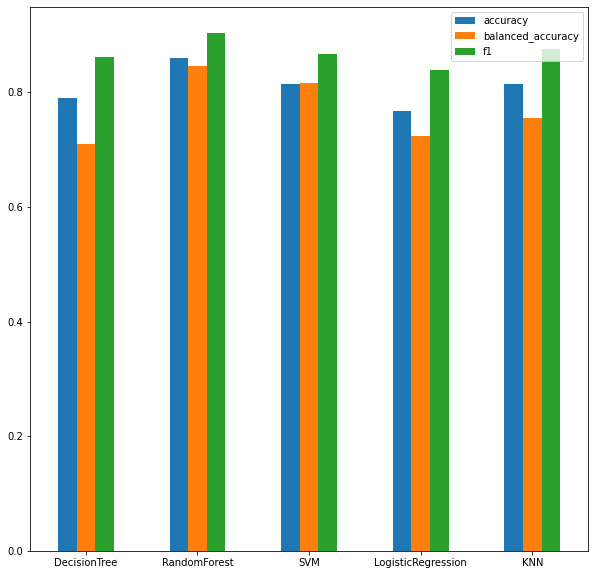

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def get_acc(model):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def get_b_acc(model):
    y_pred = model.predict(X_test)
    return balanced_accuracy_score(y_test, y_pred)


def get_f1(model):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)
                

models = [
    grid_search_cv_dtree, 
    grid_search_cv_rfc,
    grid_search_cv_svc,
    grid_search_cv_lr,
    knn,    
]
    
acc = list(map(get_acc, models))
bal_acc = list(map(get_b_acc, models))
f1 = list(map(get_f1, models))
index = ["DecisionTree", "RandomForest", "SVM",  "LogisticRegression", "KNN"]

df1 = pd.DataFrame({'accuracy': acc, 'balanced_accuracy': bal_acc, 'f1': f1}, index=index)

df1.plot.bar(rot=0, figsize=(15,15))

# Sieć neuronowa

In [43]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [44]:
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler 

X = data.drop('status', axis=1)
y = data.status

# Split into: Train, Test, Valid
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [46]:
over = RandomOverSampler()
X_res, y_res = over.fit_resample(X_train, y_train)
# X_res = X_train
# y_res = y_train

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

from keras.callbacks import History

# history = History()
# model = Sequential()
# model.add(Dense(100, use_bias=False, activation="elu", input_shape=(X_res.shape[1],)))
# model.add(BatchNormalization())
# model.add(Activation("elu"))
# model.add(Dropout(0.1))
# model.add(Dense(50, use_bias=False))
# model.add(BatchNormalization())
# model.add(Activation("elu"))
# model.add(Dropout(0.1))
# model.add(Dense(10, use_bias=False))
# model.add(BatchNormalization())
# model.add(Activation("elu"))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False, activation="elu", input_shape=(X_res.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# history = History()
# model = Sequential()
# model.add(Dense(100, activation="relu", input_shape=(X_train.shape[1],)))
# model.add(Dense(50,activation="relu"))
# model.add(Dense(10,activation="relu"))
# model.add(Dense(1,activation="sigmoid"))
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [48]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
history = model.fit(X_res, y_res, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
7/7 [==============================] - 16s 77ms/step - loss: 0.6513 - accuracy: 0.5916 - val_loss: 0.5161 - val_accuracy: 0.7429
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3934 - accuracy: 0.8192 - val_loss: 0.4677 - val_accuracy: 0.7143
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8572 - val_loss: 0.4411 - val_accuracy: 0.7143
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8775 - val_loss: 0.4255 - val_accuracy: 0.7429
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.9073 - val_loss: 0.4167 - val_accuracy: 0.7429
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.8966 - val_loss: 0.4036 - val_accuracy: 0.7429
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.8574 - val_loss: 0.4048 - val_accuracy: 0.7429
Epoch 8/100
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 0.9685 - val_loss: 0.3226 - val_accuracy: 0.8571
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9703 - val_loss: 0.3158 - val_accuracy: 0.8571
Epoch 61/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9698 - val_loss: 0.3063 - val_accuracy: 0.8857
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9654 - val_loss: 0.3067 - val_accuracy: 0.8571
Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1023 - accuracy: 0.9711 - val_loss: 0.3126 - val_accuracy: 0.8571
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9746 - val_loss: 0.3180 - val_accuracy: 0.8571
Epoch 65/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.9441 - val_loss: 0.3199 - val_accuracy: 0.8571
Epoch 66/100
7/7 [===============

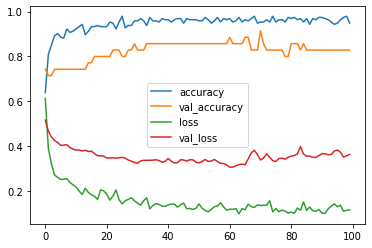

In [50]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")

plt.legend()
plt.show()

In [51]:
y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Bal. acc: ", balanced_accuracy_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

[[10  6]
 [ 5 22]]
Accuracy:  0.7441860465116279
Bal. acc:  0.7199074074074074
f1 score:  0.7999999999999999


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.79      0.81      0.80        27

    accuracy                           0.74        43
   macro avg       0.73      0.72      0.72        43
weighted avg       0.74      0.74      0.74        43



In [53]:
y_res.sum() / y_res.shape[0]
# proporcja pracujących do niepracujących w Train

0.5

In [54]:
y_test.sum() / y_test.shape[0]
# proporcja pracujących do niepracujących w Test

0.627906976744186

# Obserwacje

Sieć neuronowa osiąga wyniki prawie tak dobre, jak proste metody, z dobrze dobranymi parametrami.

Obiektywnie, udało się zadowalająco przewidywać wyniki. (Jak na tak mały dataset).

Wyniki sieci neuronowej różnią się pomiędzy kolejnymi wykonaniami o takich samych parametrach.

# Porównanie wyników

<AxesSubplot:>

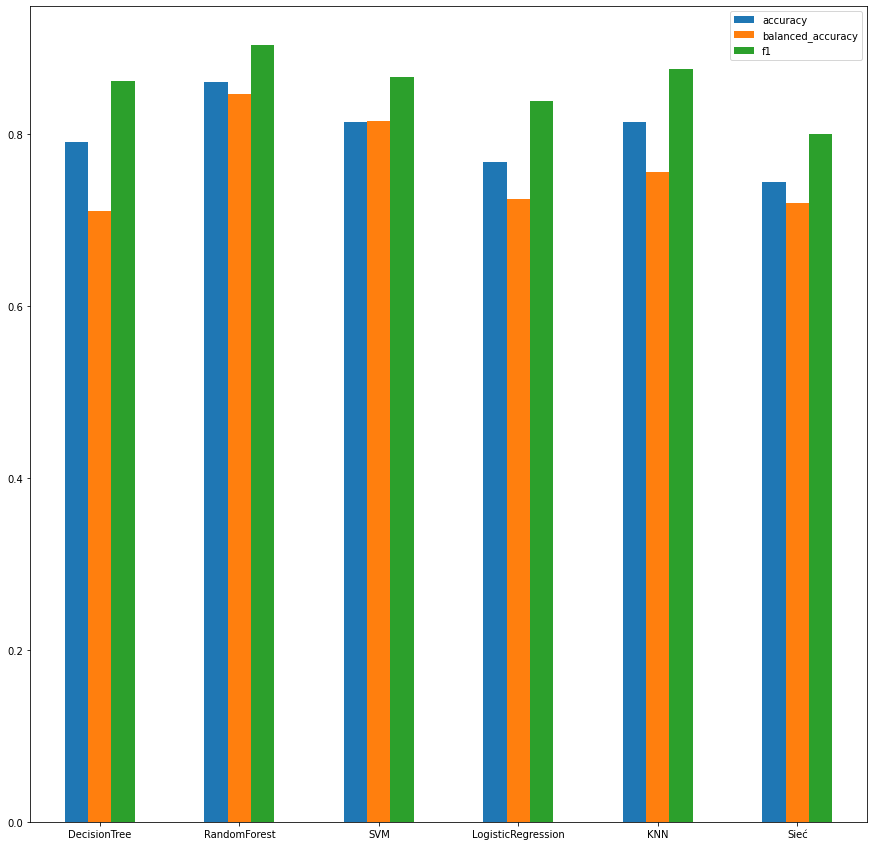

In [56]:
acc = [accuracy_score(y_test, y_pred)]
bal_acc = [balanced_accuracy_score(y_test, y_pred)]
f1 = [f1_score(y_test, y_pred)]
index = ["Sieć"]

df2 = pd.DataFrame({'accuracy': acc, 'balanced_accuracy': bal_acc, 'f1': f1}, index=index)
df1.append(df2).plot.bar(rot=0, figsize=(15,15))